# Variogram modeling

In this tutorial, we illustrate one possible workflow for fitting variograms with GeoStats.jl.

Before we proceed, please install the following packages:

In [1]:
for pkg in ["GeoStats", "GeoStatsImages", "Plots", "GR", "Interact"]
    Pkg.add(pkg)
end
# make sure this tutorial is reproducible
srand(2017);

INFO: Package GeoStats is already installed
INFO: Package GeoStatsImages is already installed
INFO: Package Plots is already installed
INFO: Package GR is already installed
INFO: Package Interact is already installed


## The data

Let's consider a simple 2D problem in which properties of a field are sampled at random locations. We will be using an image of the Walker Lake in Nevada available in `GeoStatsImages.jl` as our field:

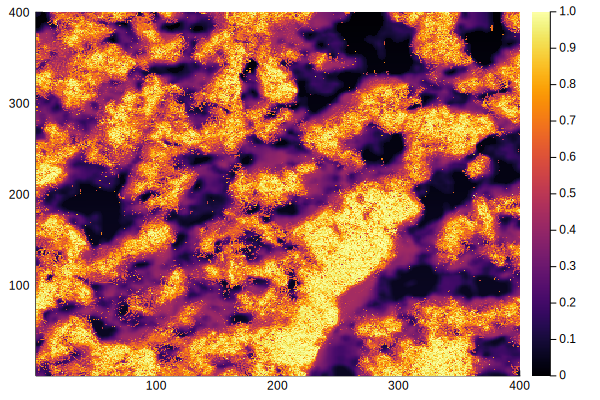

In [2]:
using GeoStatsImages
using Plots; gr()

field = training_image("WalkerLake")[:,:,1]

heatmap(field, label="Walker Lake, NV")

We sample a thousand points from the image and plot them:

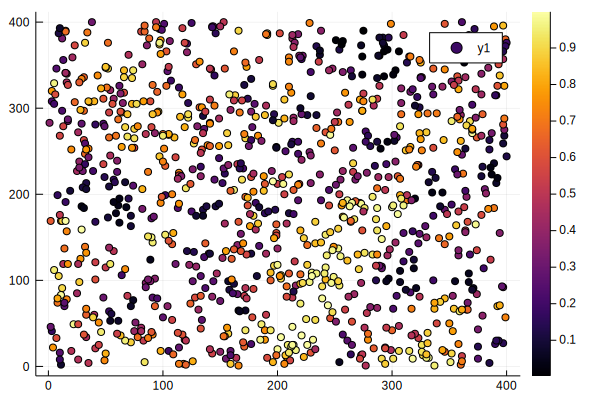

In [3]:
# sample points
nx, ny = size(field)
idxs = rand(1:nx*ny, 1000)
vals = field[idxs]

# reshape arrays
X = ind2sub((nx,ny), idxs)
X = [X[1] X[2]]'
X = Float64.(X)
z = vals

# plot (y,x) to match image orientation
scatter(X[2,:], X[1,:], zcolor=vals)

## Empirical variogram

We consider a simple omnidirectional variogram. Variogram objects in GeoStats.jl are integrated with the Julia Plots.jl framework. We can plot them directly and interact with the result as we vary the number of bins used for estimation:

Interact.Options{:SelectionSlider,Int64}(1: "input" = 15 Int64 , "nbins", 15, "15", 15, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(18=>"18",30=>"30",2=>"2",16=>"16",11=>"11",21=>"21",7=>"7",9=>"9",25=>"25",10=>"10"…)), Any[], Any[], true, "horizontal", true)

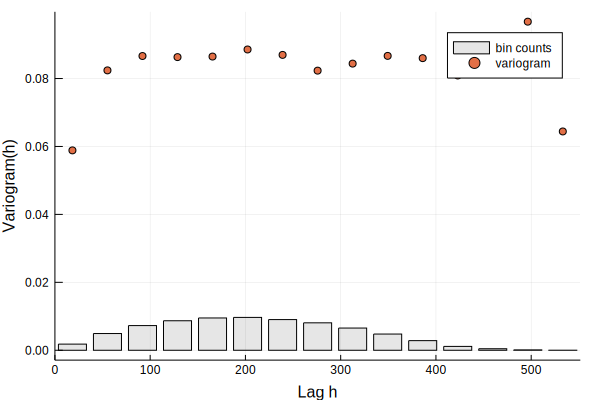

In [4]:
using GeoStats
using Interact

@manipulate for nbins=1:30
    γ = EmpiricalVariogram(X, z, nbins=nbins)
    
    plot(γ)
end

Besides the variogram itself, GeoStats.jl presents the bin counts (scaled) as a measure of confidence about the estimated points. This frequency plot can be deactived by passing the option `showbins=false` to the plot command. We encourage users to keep the bin counts option activated as it has zero cost.

This empirical variogram was constructed using the Euclidean distance between data locations. We can also specify a custom distance to estimate the variogram when points are embedded on different coordinate systems. Please consult the documentation for more distance functions.

After interacting with the plot, we select a number of bins and proceed to fitting a theoretical model:

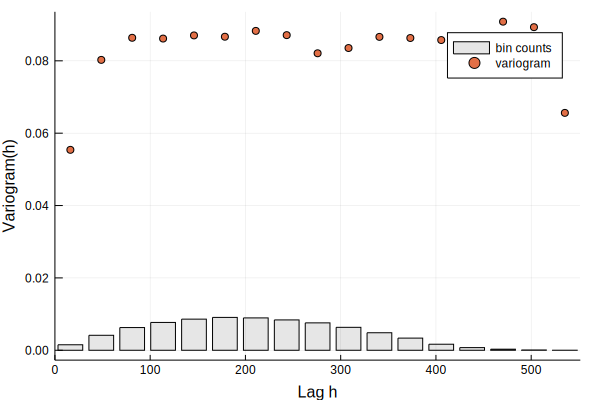

In [5]:
# final empirical variogram
γemp = EmpiricalVariogram(X, z, nbins=17)

plot(γemp)

## Theoretical variogram

We will exploit the Interact.jl package again to fit a theoretical variogram to the data. Various theoretical variogram models are available in GeoStats.jl, including a composite additive model that can be used to combine different variogram types. Please consult the documentation for more details. Here we will use a simple spherical variogram:

Interact.Options{:SelectionSlider,Float64}(5: "input-2" = 0.04897959183673469 Float64 , "s", 0.04897959183673469, "0.04897959183673469", 25, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.0020408163265306124"=>0.00204082,"0.004081632653061225"=>0.00408163,"0.006122448979591836"=>0.00612245,"0.00816326530612245"=>0.00816327,"0.01020408163265306"=>0.0102041,"0.012244897959183673"=>0.0122449,"0.014285714285714285"=>0.0142857,"0.0163265306122449"=>0.0163265,"0.018367346938775512"=>0.0183673…), Dict(0.0102041=>"0.01020408163265306",0.0183673=>"0.018367346938775512",0.0265306=>"0.026530612244897958",0.0877551=>"0.08775510204081632",0.0163265=>"0.0163265306122449",0.0693878=>"0.06938775510204082",0.0857143=>"0.08571428571428572",0.0306122=>"0.030612244897959183",0.0387755=>"0.03877551020408163",0.0367347=>"0.036734693877551024"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(7: "input-3" = 48.97959183673469 Float64 , "r", 48.97959183673469, "48.97959183673469", 25, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"2.0408163265306123"=>2.04082,"4.081632653061225"=>4.08163,"6.122448979591836"=>6.12245,"8.16326530612245"=>8.16327,"10.204081632653061"=>10.2041,"12.244897959183673"=>12.2449,"14.285714285714286"=>14.2857,"16.3265306122449"=>16.3265,"18.367346938775512"=>18.3673…), Dict(63.2653=>"63.265306122448976",75.5102=>"75.51020408163265",46.9388=>"46.93877551020408",22.449=>"22.448979591836736",55.102=>"55.10204081632653",59.1837=>"59.183673469387756",95.9184=>"95.91836734693878",93.8776=>"93.87755102040816",71.4286=>"71.42857142857143",18.3673=>"18.367346938775512"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(9: "input-4" = 0.04897959183673469 Float64 , "n", 0.04897959183673469, "0.04897959183673469", 25, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.0020408163265306124"=>0.00204082,"0.004081632653061225"=>0.00408163,"0.006122448979591836"=>0.00612245,"0.00816326530612245"=>0.00816327,"0.01020408163265306"=>0.0102041,"0.012244897959183673"=>0.0122449,"0.014285714285714285"=>0.0142857,"0.0163265306122449"=>0.0163265,"0.018367346938775512"=>0.0183673…), Dict(0.0102041=>"0.01020408163265306",0.0183673=>"0.018367346938775512",0.0265306=>"0.026530612244897958",0.0877551=>"0.08775510204081632",0.0163265=>"0.0163265306122449",0.0693878=>"0.06938775510204082",0.0857143=>"0.08571428571428572",0.0306122=>"0.030612244897959183",0.0387755=>"0.03877551020408163",0.0367347=>"0.036734693877551024"…)), Any[], Any[], true, "horizontal", true)

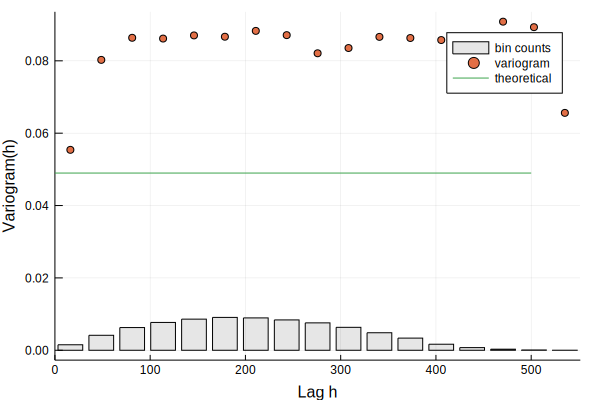

In [6]:
@manipulate for s=linspace(0,.1), r=linspace(0,100), n=linspace(0,.1)
    # theoretical variogram
    γtheo = SphericalVariogram(sill=s, range=r, nugget=n)

    plot(γemp)
    plot!(γtheo, maxlag=500., label="theoretical")
end

After tuning the parameters of the theoretical variogram interactively, we plot the final result:

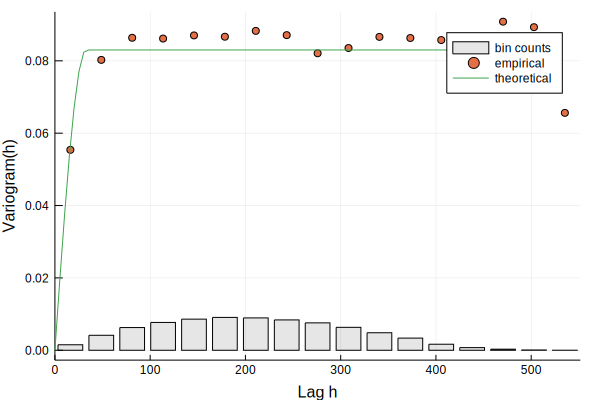

In [7]:
γtheo = SphericalVariogram(sill=.083, range=32.653)

plot(γemp, label="empirical")
plot!(γtheo, maxlag=500., label="theoretical")

## Automatic fitting

An alternative option to interactive variogram modeling is automatic fitting. We can fit a specific theoretical variogram model with:

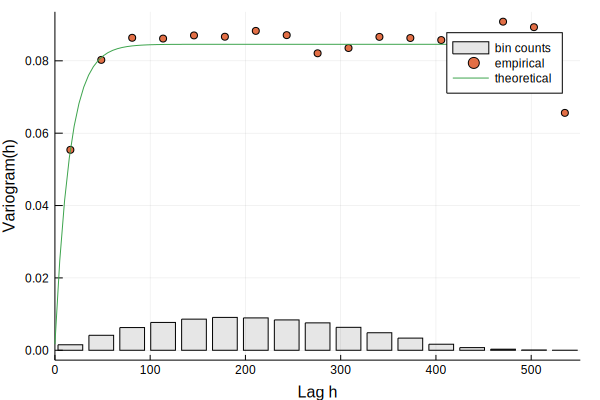

In [8]:
γtheo = fit(ExponentialVariogram, γemp)

plot(γemp, label="empirical")
plot!(γtheo, maxlag=500., label="theoretical")

or let GeoStats.jl pick the model with minimum weighted least squares error by passing the super type `Variogram`:

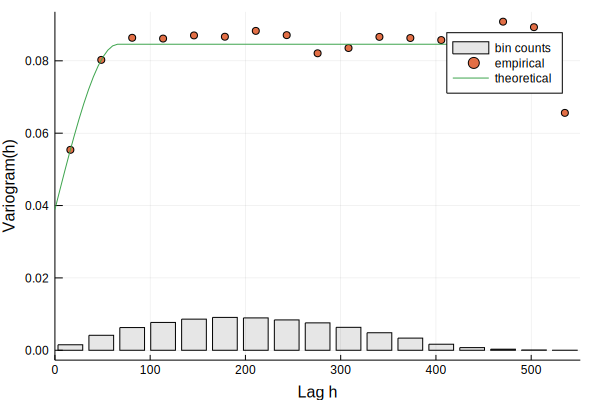

In [9]:
γtheo = fit(Variogram, γemp)

plot(γemp, label="empirical")
plot!(γtheo, maxlag=500., label="theoretical")

which in this example turns out to be:

In [10]:
γtheo

Variography.SphericalVariogram{Float64,Distances.Euclidean}
  range: Float64 66.03600703908447
  sill: Float64 0.08458251596937198
  nugget: Float64 0.0389026309288709
  distance: Distances.Euclidean


## Conclusions

- Variogram modeling is an important step in classical geostatistics. Some practioners prefer to model variograms interactively to enforce a specific type of spatial continuity, whereas others prefer to use automatic fitting procedures, which are guaranteed to minimize a given loss function.

- Both approaches are available in GeoStats.jl, and are useful under different circumstances.